# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muchammad Basroil Billah]
- **Email:** [muchammadbasroil168@gmail.com]
- **ID Dicoding:** [muchammad_basroil]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim bisa mempengaruhi produktivitas jumlah pengguna sepeda?
- Dari tahun 2011 dan 2012 manakah yang menunjukkan intensitas pengguna sepeda yang paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Disini kita load dulu datanya agar bisa

### Assessing Data

####Data day.csv

In [7]:
print("Data dari day.csv:")
print(day_df.head())

Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [8]:
#Menampilkan informasi mengenai tipe data di setiap kolom day_df
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [9]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
# Memeriksa jumlah nilai yang hilang di setiap kolom day_df
missing_values_day = day_df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom day_df:")
print(missing_values_day[missing_values_day > 0])

Jumlah nilai yang hilang di setiap kolom day_df:
Series([], dtype: int64)


In [11]:
# Memeriksa apakah ada baris duplikat dalam dataset day_df
duplicate_rows_day = day_df.duplicated().sum()
print(f"Jumlah baris duplikat di day_df: {duplicate_rows_day}")

Jumlah baris duplikat di day_df: 0


In [12]:
day_df.duplicated().sum()

0

#####Data hour.csv

In [13]:
print("/content/hour.csv")
print(hour_df.head())

/content/hour.csv
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [14]:
# Menampilkan informasi mengenai tipe data di setiap kolom hour_df
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [15]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [16]:
# Memeriksa jumlah nilai yang hilang di setiap kolom hour_df
missing_values_hour = hour_df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom hour_df:")
print(missing_values_hour[missing_values_hour > 0])

Jumlah nilai yang hilang di setiap kolom hour_df:
Series([], dtype: int64)


In [17]:
# Memeriksa apakah ada baris duplikat dalam dataset hour_df
duplicate_rows_hour = hour_df.duplicated().sum()
print(f"Jumlah baris duplikat di hour_df: {duplicate_rows_hour}")

Jumlah baris duplikat di hour_df: 0


In [18]:
hour_df.duplicated().sum()

0

### Cleaning Data

*Membersihkan Data day.csv*

In [19]:
# Menghapus kolom yang tidak diperlukan (misalnya 'instant')
day_df_clean = day_df.drop(columns=['instant'])

In [20]:
# Mengonversi kolom 'dteday' menjadi format datetime untuk analisis yang lebih mudah
day_df_clean['dteday'] = pd.to_datetime(day_df_clean['dteday'])

In [21]:
# Menghapus baris duplikat jika ada
day_df_clean = day_df_clean.drop_duplicates()

In [22]:
day_df_clean.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
# Memeriksa kembali nilai yang hilang setelah pembersihan
missing_values_cleaned_day = day_df_clean.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom day_df setelah pembersihan:")
print(missing_values_cleaned_day[missing_values_cleaned_day > 0])

Jumlah nilai yang hilang di setiap kolom day_df setelah pembersihan:
Series([], dtype: int64)


*Membersihkan data hour.csv*

In [24]:
# Menghapus kolom yang tidak diperlukan (misalnya 'instant')
hour_df_clean = hour_df.drop(columns=['instant'])

In [25]:
# Mengonversi kolom 'dteday' menjadi format datetime untuk analisis yang lebih mudah
hour_df_clean['dteday'] = pd.to_datetime(hour_df_clean['dteday'])

In [26]:
# Menghapus baris duplikat jika ada
hour_df_clean = hour_df_clean.drop_duplicates()

In [27]:
hour_df_clean.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [28]:
# Memeriksa kembali nilai yang hilang setelah pembersihan
missing_values_cleaned_hour = hour_df_clean.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom hour_df setelah pembersihan:")
print(missing_values_cleaned_hour[missing_values_cleaned_hour > 0])

Jumlah nilai yang hilang di setiap kolom hour_df setelah pembersihan:
Series([], dtype: int64)


## Exploratory Data Analysis (EDA)

### Explore dataset day.csv untuk melihat hasil Distribusi total penyewaan sepeda dan penyewaan sepeda

In [29]:
# Menampilkan informasi umum tentang dataset
print("Informasi Umum tentang Dataset:")
print(day_df_clean.info())

# Menampilkan deskripsi statistik
print("\nDeskripsi Statistik:")
print(day_df_clean.describe())

Informasi Umum tentang Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10

In [30]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = day_df_clean.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values[missing_values > 0])

# Memeriksa jumlah baris duplikat
duplicate_rows = day_df_clean.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows}")


Jumlah nilai yang hilang di setiap kolom:
Series([], dtype: int64)

Jumlah baris duplikat: 0


In [31]:
# Menghitung total penyewaan sepeda
total_rentals = day_df_clean['cnt'].sum()
print(f"\nTotal Penyewaan Sepeda: {total_rentals}")


Total Penyewaan Sepeda: 3292679


In [32]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.month_name()  # Mengambil nama bulan

# Menghitung total penyewaan per bulan
monthly_rentals = day_df.groupby('month')['cnt'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)  # Mengurutkan bulan secara alami

<ipython-input-33-b469aa203208>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

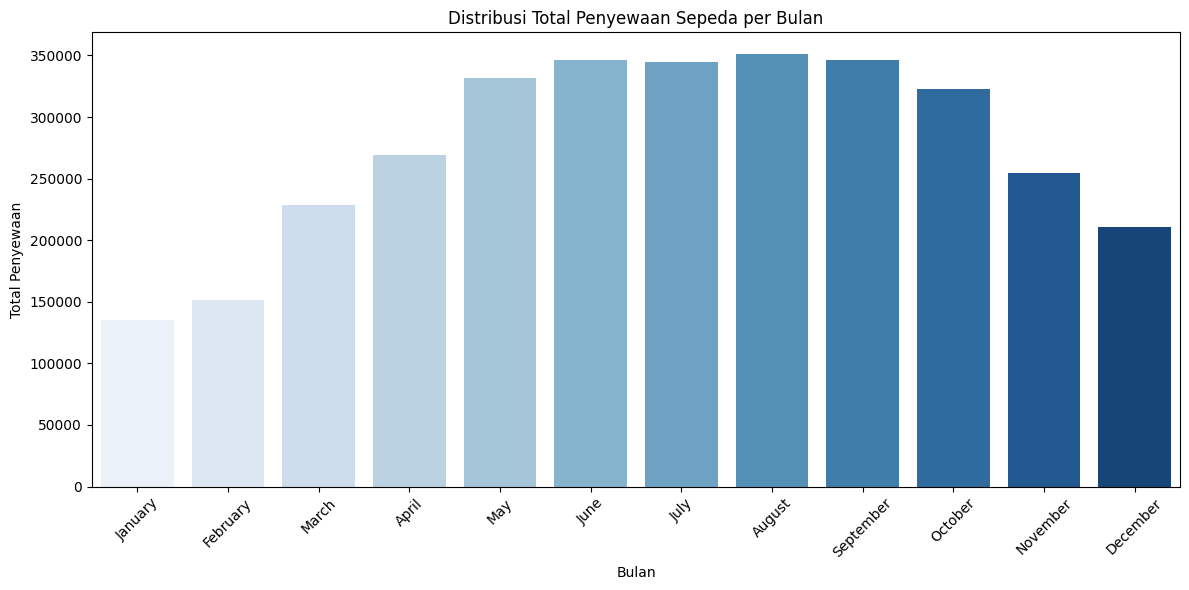

In [33]:
# Visualisasi distribusi total penyewaan sepeda per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values, palette='Blues')
plt.title('Distribusi Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Menghitung rata-rata penyewaan berdasarkan musim
average_rentals_by_season = day_df_clean.groupby('season')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Musim:")
print(average_rentals_by_season)


Rata-rata Penyewaan Berdasarkan Musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [35]:
# Menentukan keterangan musim
def get_season(season_code):
    if season_code == 1:
        return 'Spring'
    elif season_code == 2:
        return 'Summer'
    elif season_code == 3:
        return 'Fall'
    elif season_code == 4:
        return 'Winter'
    else:
        return 'Unknown'

<ipython-input-36-124045ca56d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='season_name', y='cnt', estimator=sum, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

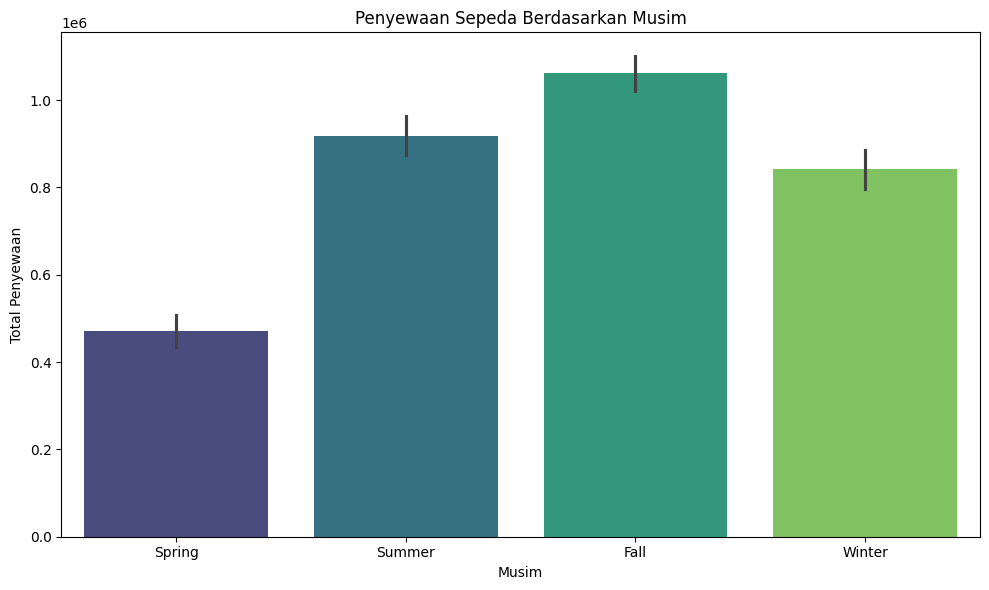

In [36]:
day_df['season_name'] = day_df['season'].apply(get_season)

# Visualisasi penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season_name', y='cnt', estimator=sum, palette='viridis')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Explore dataset hour.csv untuk melihat Tren penyewaan sepeda dari waktu ke waktu

In [37]:
# Menghitung total penyewaan per hari
daily_trend = day_df_clean.groupby('dteday')['cnt'].sum().reset_index()
print("\nTren Penyewaan Sepeda per Hari:")
print(daily_trend.head())  # Menampilkan 5 baris pertama


Tren Penyewaan Sepeda per Hari:
      dteday   cnt
0 2011-01-01   985
1 2011-01-02   801
2 2011-01-03  1349
3 2011-01-04  1562
4 2011-01-05  1600


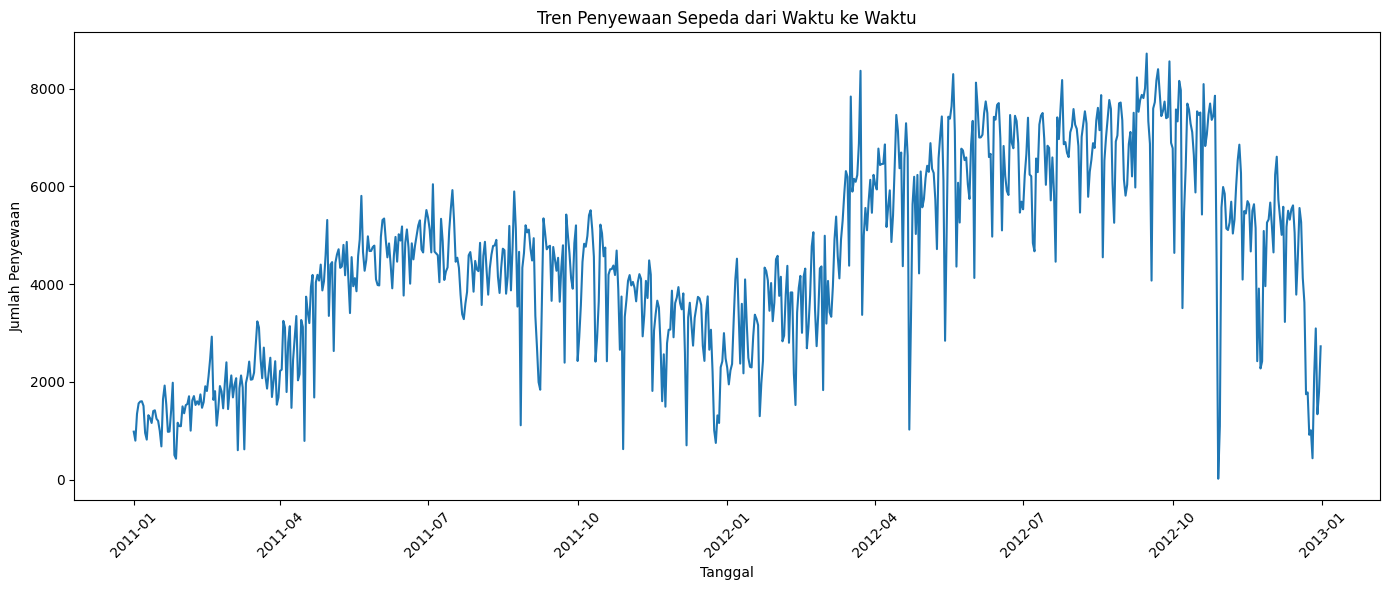

In [38]:
# Menghitung total penyewaan per hari
daily_trend = day_df_clean.groupby('dteday')['cnt'].sum().reset_index()

# Visualisasi tren penyewaan dari waktu ke waktu
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='dteday', y='cnt')
plt.title('Tren Penyewaan Sepeda dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [39]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
average_rentals_by_weather = day_df_clean.groupby('weathersit')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Kondisi Cuaca:")
print(average_rentals_by_weather)


Rata-rata Penyewaan Berdasarkan Kondisi Cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


In [40]:
weather_effect = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Menambahkan keterangan kondisi cuaca
weather_conditions = {
    1: 'Jelas, Beberapa Awan',
    2: 'Kabut, Beberapa Awan, Hujan Ringan',
    3: 'Awan Tebal',
    4: 'Hujan Berat, Hujan Es'
}

<ipython-input-41-011aae181f77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_effect, x='Kondisi Cuaca', y='cnt', palette='Oranges')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

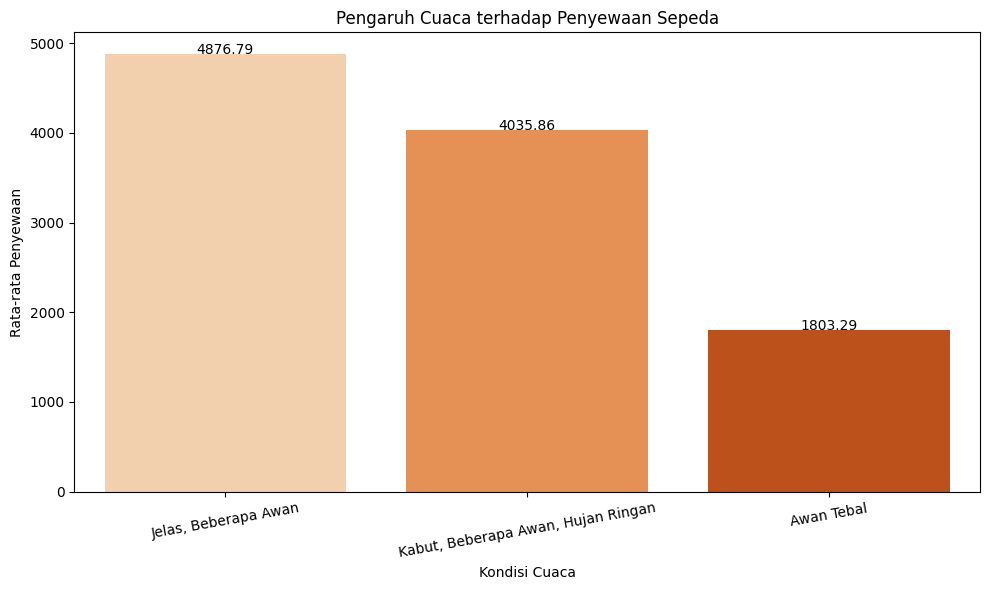

In [41]:
weather_effect['Kondisi Cuaca'] = weather_effect['weathersit'].map(weather_conditions)

# Visualisasi pengaruh cuaca terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_effect, x='Kondisi Cuaca', y='cnt', palette='Oranges')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')

# Menambahkan anotasi untuk menunjukkan nilai rata-rata di atas batang
for index, row in weather_effect.iterrows():
    plt.text(index, row['cnt'], round(row['cnt'], 2), color='black', ha="center")

plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

<ipython-input-42-e38b20c1ff62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_comparison, x='yr', y='cnt', palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


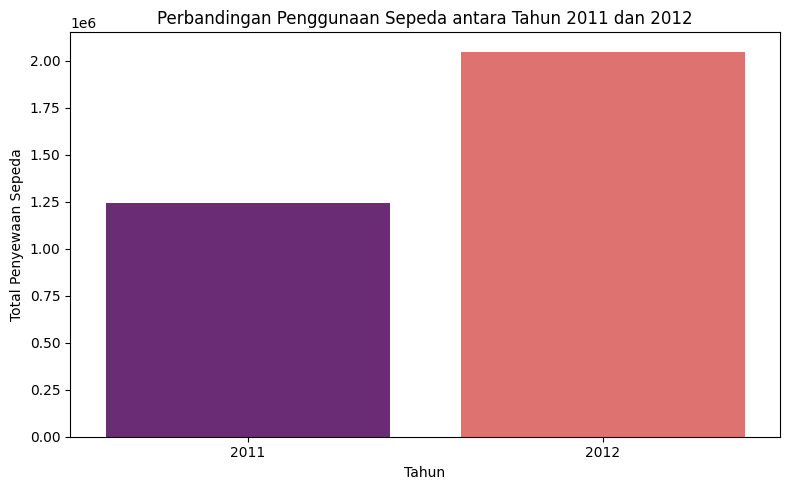

In [42]:
# Menghitung total penyewaan sepeda berdasarkan tahun
year_comparison = day_df_clean.groupby('yr')['cnt'].sum().reset_index()

# Visualisasi perbandingan penggunaan sepeda antara tahun 2011 dan 2012
plt.figure(figsize=(8, 5))
sns.barplot(data=year_comparison, x='yr', y='cnt', palette='magma')
plt.title('Perbandingan Penggunaan Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])
plt.tight_layout()
plt.show()  # Menampilkan grafik

## Analisis Lanjutan (Clustering)

Clustering adalah teknik analisis data yang digunakan untuk mengelompokkan data ke dalam grup atau kluster berdasarkan karakteristik yang sama. Tujuan utama dari clustering adalah untuk menemukan pola dalam data yang dapat membantu dalam segmentasi dan pengambilan keputusan yang lebih baik.

Melalui penerapan teknik analisis clustering, kita dapat memperoleh wawasan yang lebih mendalam tentang perilaku pengguna penyewaan sepeda, yang dapat digunakan untuk menginformasikan strategi bisnis dan meningkatkan layanan. Teknik analisa ini tidak hanya memberikan pemahaman yang lebih baik tentang pengguna, tetapi juga mendukung keputusan yang berbasis data untuk meningkatkan efisiensi operasional dan kepuasan pelanggan.

In [43]:
print(day_df_clean[['dteday', 'cnt']].head())

      dteday   cnt
0 2011-01-01   985
1 2011-01-02   801
2 2011-01-03  1349
3 2011-01-04  1562
4 2011-01-05  1600


*Manual Grouping*

In [44]:
# Menentukan kriteria pengelompokan berdasarkan jumlah penyewaan
def categorize_rentals(count):
    if count <= 500:
        return 'Low'
    elif 501 <= count <= 1500:
        return 'Medium'
    else:
        return 'High'

# Mengelompokkan data berdasarkan jumlah penyewaan
day_df_clean['Rental Category'] = day_df_clean['cnt'].apply(categorize_rentals)

# Menampilkan hasil pengelompokan
print("Pengelompokan berdasarkan jumlah penyewaan:")
print(day_df_clean[['cnt', 'Rental Category']].head())

Pengelompokan berdasarkan jumlah penyewaan:
    cnt Rental Category
0   985          Medium
1   801          Medium
2  1349          Medium
3  1562            High
4  1600            High


*Binning*

In [45]:
# Menentukan batas bin
bins = [0, 500, 1000, 1500, 2000, 3000]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001 ke atas']

# Menggunakan pd.cut untuk melakukan binning
day_df_clean['Binned Rentals'] = pd.cut(day_df_clean['cnt'], bins=bins, labels=labels, right=True)

# Menampilkan hasil binning
print("Hasil Binning berdasarkan jumlah penyewaan:")
print(day_df_clean[['cnt', 'Binned Rentals']].head())

Hasil Binning berdasarkan jumlah penyewaan:
    cnt Binned Rentals
0   985       501-1000
1   801       501-1000
2  1349      1001-1500
3  1562      1501-2000
4  1600      1501-2000


In [46]:
sns.set(style="whitegrid")

<ipython-input-47-5a9362588612>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouping_counts.index, y=grouping_counts.values, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

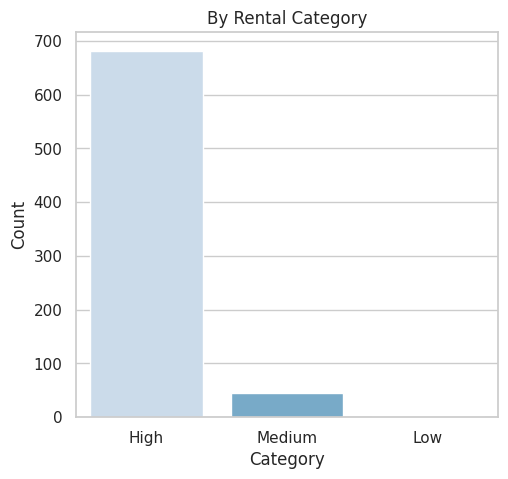

In [47]:
# Menghitung jumlah penyewaan berdasarkan kategori
grouping_counts = day_df_clean['Rental Category'].value_counts()

# Visualisasi hasil manual grouping
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # Bar chart untuk manual grouping
sns.barplot(x=grouping_counts.index, y=grouping_counts.values, palette='Blues')
plt.title('By Rental Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

<ipython-input-48-776a1a5afb51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=binned_counts.index, y=binned_counts.values, palette='Greens')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

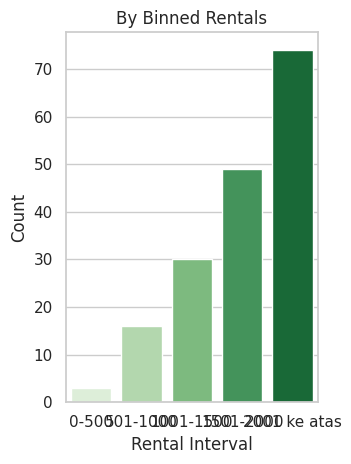

In [48]:
# Menghitung jumlah penyewaan berdasarkan bin
binned_counts = day_df_clean['Binned Rentals'].value_counts()

# Visualisasi hasil binning
plt.subplot(1, 2, 2)  # Bar chart untuk binning
sns.barplot(x=binned_counts.index, y=binned_counts.values, palette='Greens')
plt.title('By Binned Rentals')
plt.xlabel('Rental Interval')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()  # Menampilkan grafik

## Conclusion

- Conclution pertanyaan 1 : Hasil analisis menunjukkan bahwa musim dan kondisi cuaca memiliki dampak signifikan terhadap jumlah pengguna sepeda. Pada umumnya, penggunaan sepeda meningkat selama musim panas dengan kondisi cuaca yang baik, sementara penurunan signifikan terjadi pada musim dingin atau saat cuaca buruk. Hal ini mengindikasikan bahwa faktor lingkungan memainkan peranan penting dalam keputusan individu untuk menggunakan sepeda sebagai moda transportasi.

- Conclution pertanyaan 2 : Analisis menunjukkan bahwa tahun 2012 mencatatkan total penyewaan sepeda yang lebih tinggi dibandingkan tahun 2011. Peningkatan ini dapat dikaitkan dengan meningkatnya kesadaran masyarakat akan manfaat bersepeda, serta kemungkinan adanya program promosi atau peningkatan infrastruktur untuk bersepeda. Hal ini menunjukkan tren positif dalam penggunaan sepeda sebagai alternatif transportasi yang lebih ramah lingkungan.